# 금융 시계열 데이터 예측 실습 - ARIMA & ARCH 등 활용

### ARIMA 활용 기초

In [191]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

 데이터 로드, 확인 및 시각화

In [192]:
raw_url = "https://raw.githubusercontent.com/NitinBhore/Daily_Demand_Orders_Forecast/main/Daily%20Demand%20Forecasting%20Orders.csv"

df = pd.read_csv(raw_url)
df.head()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [193]:
df.columns # Target = Total orders를 예측

Index(['Unnamed: 0',
       'Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

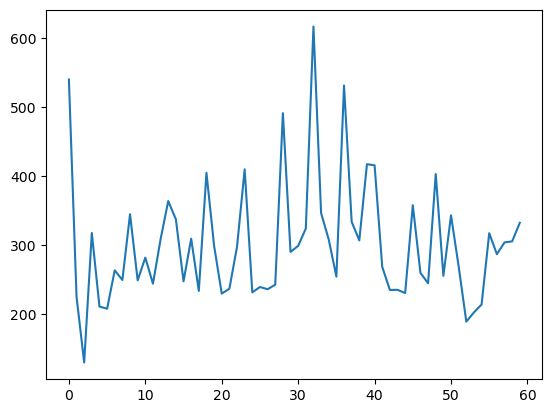

In [194]:
plt.plot(df['Target (Total orders)'])
plt.show()

In [195]:
data = df['Target (Total orders)']

 ACF 및 PACF를 통한 데이터 확인 및 시각화

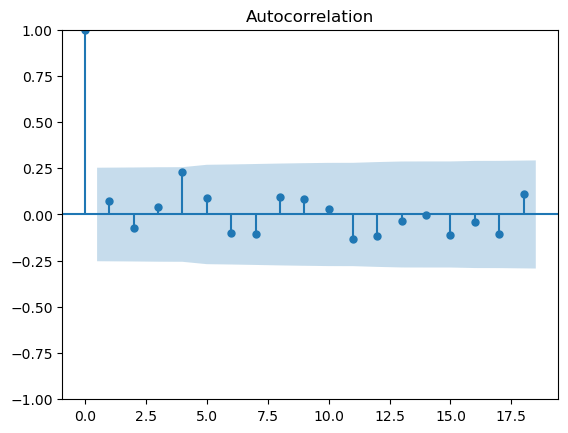

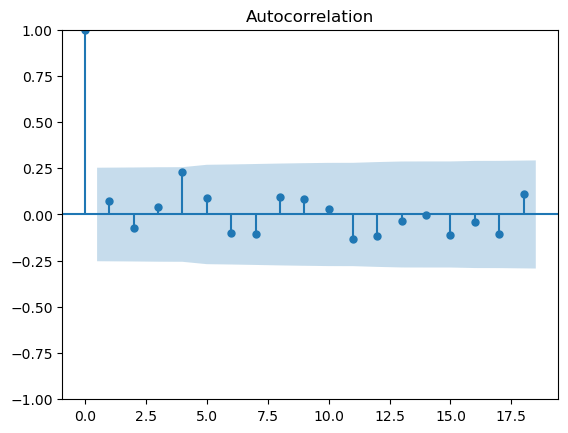

In [196]:
plot_acf(data)

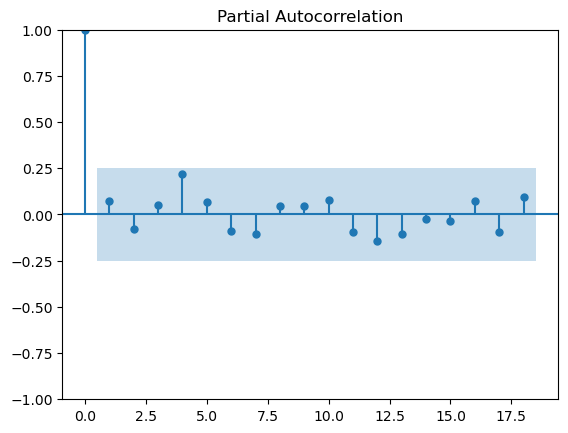

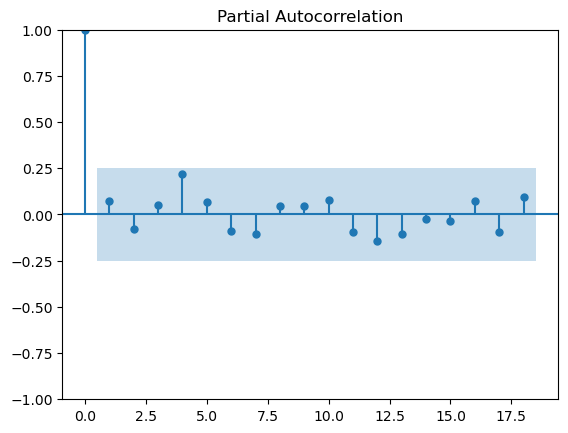

In [197]:
plot_pacf(data)

ARIMA 적용

In [198]:
model1 = ARIMA(data, order = (1,0,0)) # p,d,q
model2 = ARIMA(data, order = (1,0,1)) 
model3 = ARIMA(data, order = (1,0,1)) 

res1 = model1.fit()
res2 = model2.fit()
res3 = model3.fit()

ARIMA 결과 확인

In [199]:
print(res1.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Mon, 26 May 2025   AIC                            714.362
Time:                           15:52:13   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5795   1363

In [200]:
print(res2.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -354.075
Date:                   Mon, 26 May 2025   AIC                            716.150
Time:                           15:52:13   BIC                            724.528
Sample:                                0   HQIC                           719.427
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.2370     17.534     17.180      0.000     266.871     335.603
ar.L1         -0.2589      1.442     -0.180      0.857      -3.085       2.567
ma.L1          0.3581      1

In [201]:
print(res3.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -354.075
Date:                   Mon, 26 May 2025   AIC                            716.150
Time:                           15:52:13   BIC                            724.528
Sample:                                0   HQIC                           719.427
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.2370     17.534     17.180      0.000     266.871     335.603
ar.L1         -0.2589      1.442     -0.180      0.857      -3.085       2.567
ma.L1          0.3581      1

In [202]:
predictions = res2.fittedvalues

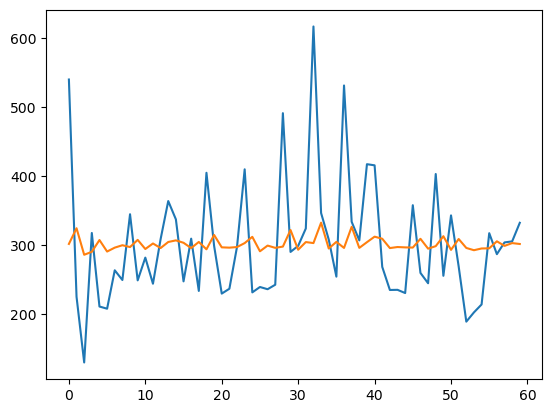

In [203]:
plt.figure()
plt.plot(data)
plt.plot(predictions)
plt.show()

Auto ARIMA 적용

In [204]:
model = pm.AutoARIMA(seasonal=False, stepwise=True, suppress_warnings=True, trace=True)

In [205]:
res = model.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.092, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=747.489, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=818.332, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=741.019, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=735.047, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=724.987, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=723.726, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=722.186, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=791.913, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.286, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=712.710, Time=0.0

In [206]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                -354.355
Date:                Mon, 26 May 2025   AIC                            712.710
Time:                        15:52:14   BIC                            716.898
Sample:                             0   HQIC                           714.348
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    300.8733     15.236     19.747      0.000     271.011     330.736
sigma2      7894.7169   1313.366      6.011      0.000    5320.567    1.05e+04
Ljung-Box (L1) (Q):                   0.33   Jarque-

- 특정 시점을 기준으로 일정 간격의 과거 데이터를 활용할 것으로 기대했는데 시점을 정하지 않는 건 왜일까?
   * 토의 결과 전체 데이터를 학습해서 전체 기간에 대해 예측하는 것으로 판단됨.

## 미니 프로젝트: ARIMA, ARCH
### ARIMA 실습

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA # 아리마 모델
import pmdarima as pm # 오토 아리마

In [3]:
ap = pd.read_csv('./AirPassengers2.csv')

In [4]:
ap.drop('Month', axis=1, inplace=True)

In [210]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


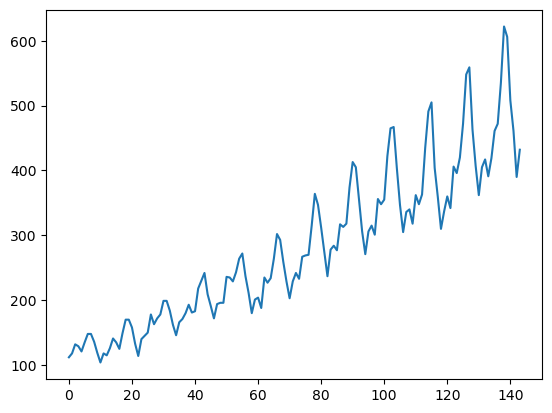

In [211]:
plt.plot(ap)
plt.show()

Log Transform(변환)을 통해 variance를 일정하게 조절

In [5]:
ap_transformed = np.log(ap)

In [213]:
ap_transformed.head()

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791


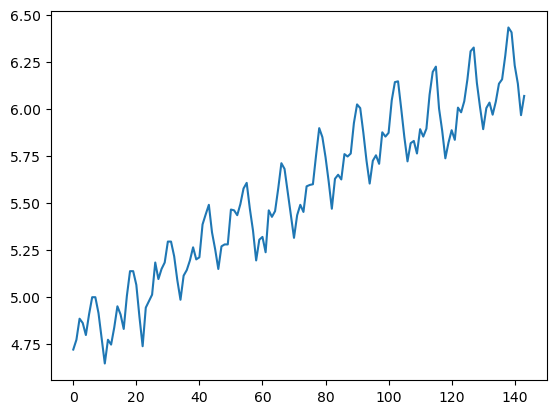

In [214]:
plt.plot(ap_transformed)
plt.show()

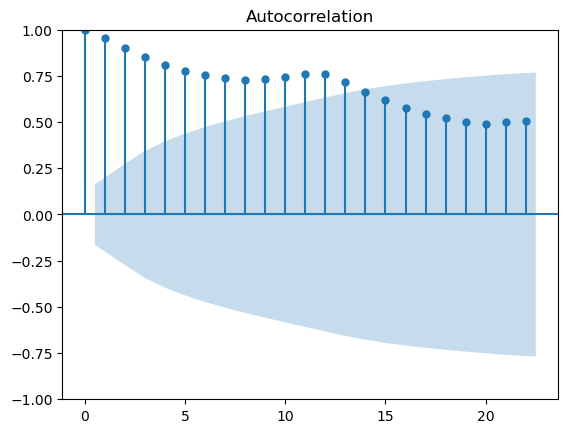

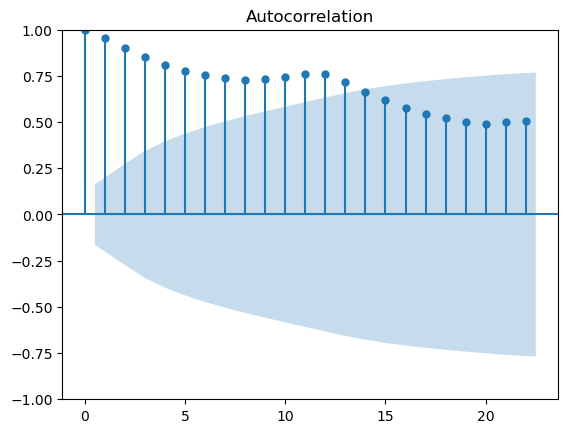

In [215]:
plot_acf(ap_transformed) # 점차 감소하는 모양새 -> 증가하는 추세를 제거하기 위해 차분 필요

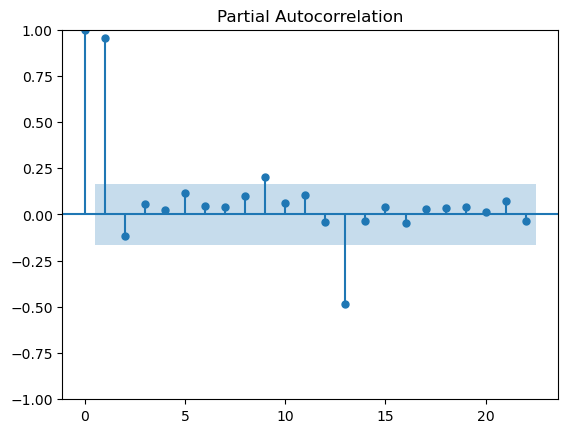

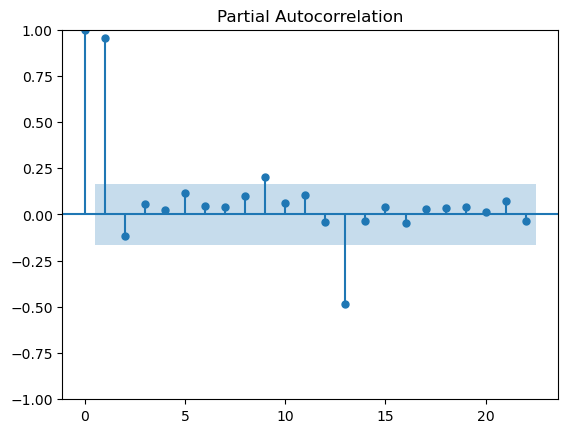

In [216]:
plot_pacf(ap_transformed) # lag 2까지 유의미한 결과

In [217]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

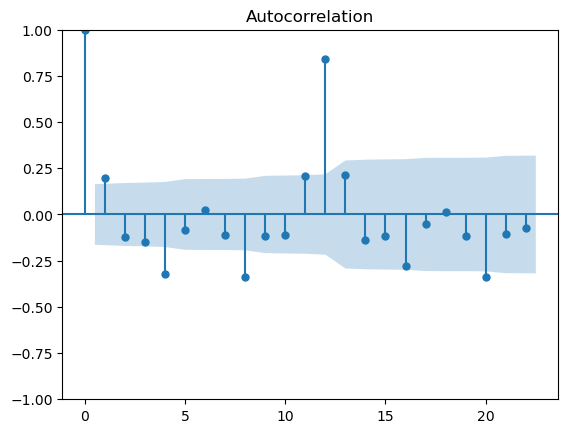

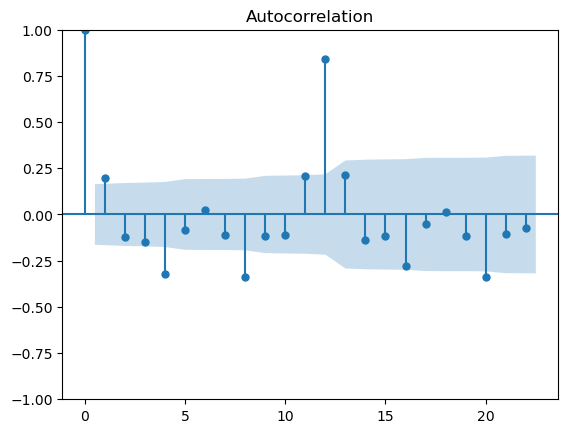

In [218]:
plot_acf(ap_diff) # lag 1과, lag 2에서 유의미한 lag 포착

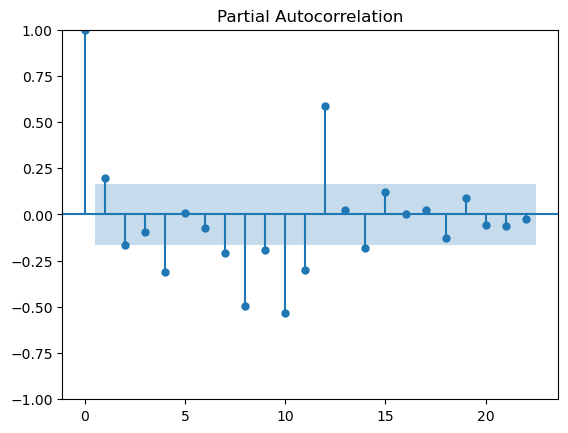

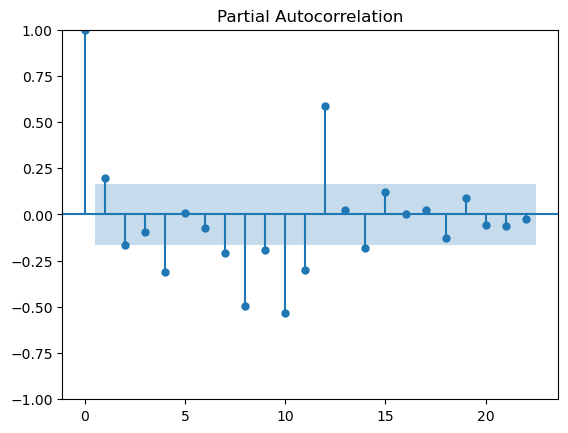

In [219]:
plot_pacf(ap_diff) # lag 1, lag 8~12에서 유의미한 lag 포착

acf와 pacf에서 n=12쯤 유의미하므로, 계절성 성분으로 추정   
auto-arima 적합 시 계절성 고려

In [220]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


train, test set 분리

In [7]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

auto-arima로 모델 적합

In [227]:
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)
# AIC=inf면 안좋음.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.739, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.581, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-215.679, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.853, Time=0.24 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.12 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.386, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.24 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.662, Time=0.31 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

ARIMA(5,1,2) 모델이 가장 적합하다고 나옴

In [223]:
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True)
# confidence interval까지 도출

In [224]:
preds.shape[0]

29

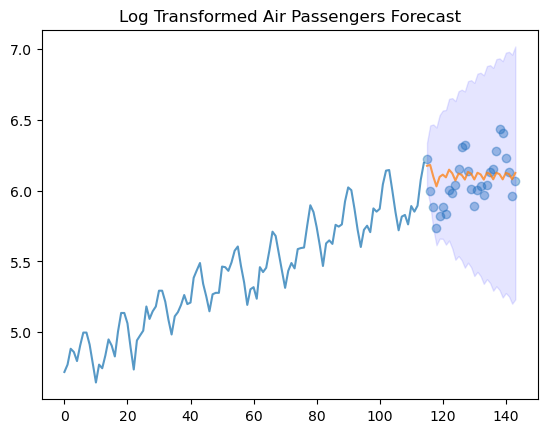

In [225]:
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0])

plt.plot(x_axis[:ap_transformed_train.shape[0]], ap_transformed_train, alpha=0.75)
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75)
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap_transformed_test, alpha=0.4, marker='o')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:,0], conf_int[:,1],
                 alpha=0.1, color='b')
plt.title('Log Transformed Air Passengers Forecast')
plt.show()

In [226]:
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(5, 1, 2)   Log Likelihood                 119.680
Date:                Mon, 26 May 2025   AIC                           -223.361
Time:                        15:55:36   BIC                           -201.471
Sample:                             0   HQIC                          -214.477
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5028      0.144     -3.490      0.000      -0.785      -0.220
ar.L2         -0.6910      0.138     -5.020      0.000      -0.961      -0.421
ar.L3          0.0128      0.153      0.083      0.9

동일하게 입력했음에도 동영상 및 다른 그루분들과 다르게 결과가 발생하여 ARIMA로 수기 입력해도 아래와 동일하게 그려지지는 않음.    

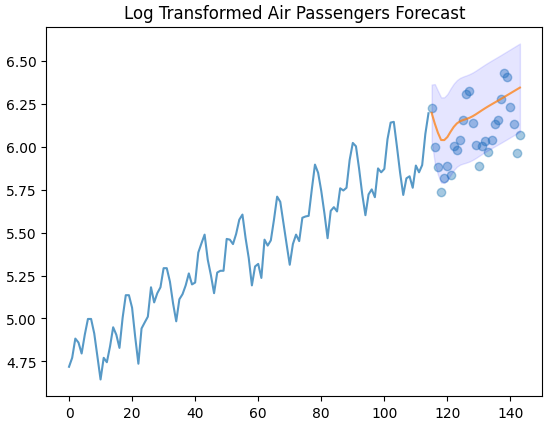

In [8]:
from pmdarima.arima import ARIMA

model = ARIMA(order=(1,1,4), seasonal_order=(1,1,1,12))
model.fit(ap_transformed_train)
preds, conf_int = model.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True)
# preds, conf_int = model.predict(n_periods=len(ap_transformed_test), return_conf_int=True)

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


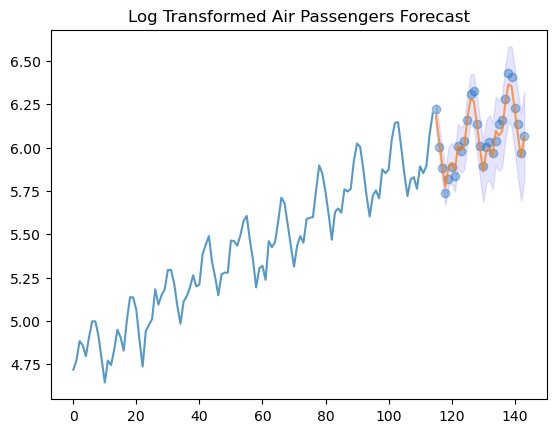

In [9]:
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0])

plt.plot(x_axis[:ap_transformed_train.shape[0]], ap_transformed_train, alpha=0.75)
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75)
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap_transformed_test, alpha=0.4, marker='o')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:,0], conf_int[:,1],
                 alpha=0.1, color='b')
plt.title('Log Transformed Air Passengers Forecast')
plt.show()

In [285]:
model = ARIMA(order=(4,1,2), seasonal_order=(1,1,1,12))
model.fit(ap_transformed_train)
preds, conf_int = model.predict(n_periods=len(ap_transformed_test), return_conf_int=True)

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


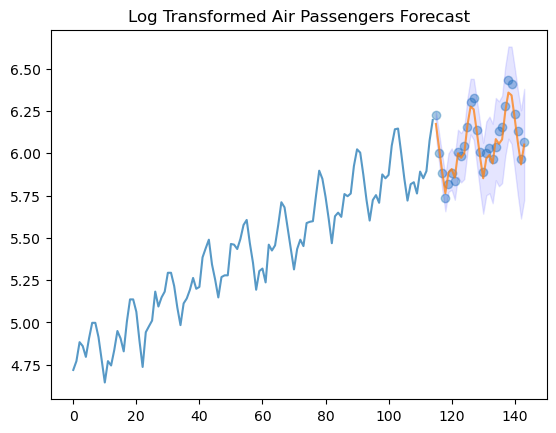

In [286]:
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0])

plt.plot(x_axis[:ap_transformed_train.shape[0]], ap_transformed_train, alpha=0.75)
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75)
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap_transformed_test, alpha=0.4, marker='o')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:,0], conf_int[:,1],
                 alpha=0.1, color='b')
plt.title('Log Transformed Air Passengers Forecast')
plt.show()

### ARCH 모델 실습

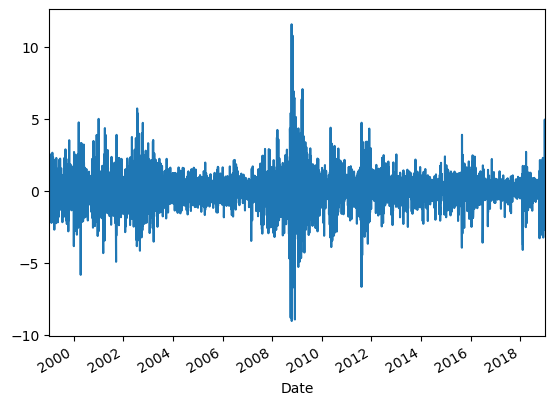

In [244]:
import datetime as dt
import arch.data.sp500


# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다.
plt.show()

Conditional Heteroskedasciticity (군집) 확인됨.

In [ ]:
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

print(res.summary())

# p-value, AIC, BIC가 중요 (A, B 모두 낮을 수록 적합도가 좋음)
# alph 1, beta 1이 GARCH(1,1)을 의미하며 신뢰도 95%에서 이들이 유의미함을 도출 

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:         

In [248]:
# 내 결과는 alpha가 생략되어 표시안되지만 text로 열어보니 아래와 같이 확인됨
# omega          0.0175  4.683e-03      3.738  1.854e-04 [8.328e-03,2.669e-02]
# alpha[1]       0.1022  1.301e-02      7.852  4.105e-15   [7.665e-02,  0.128]
# beta[1]        0.8852  1.380e-02     64.125      0.000     [  0.858,  0.912]

자동적으로 GARCH 모델에 적합

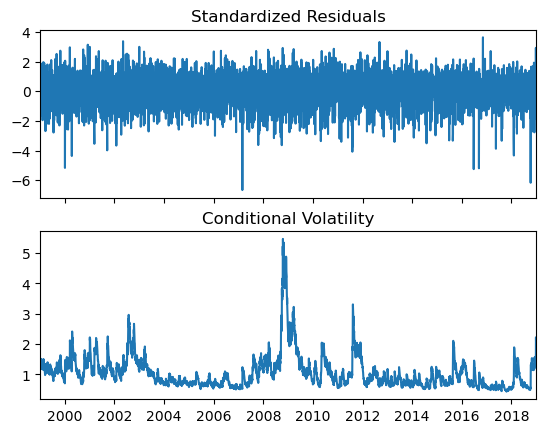

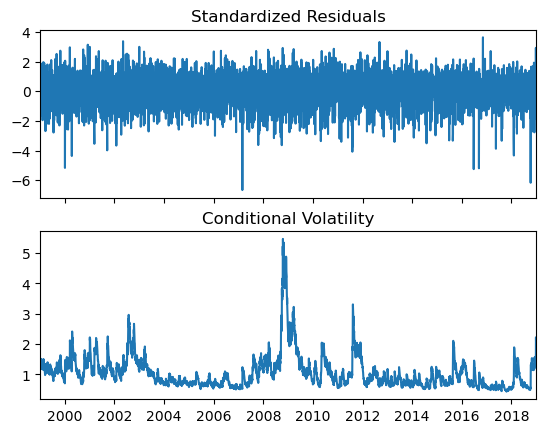

In [249]:
res.plot()

그루분들과 논의 결과, ARCH 모델은 기본적으로 GARCH를 수행하여 AR과 MA를 모두 활용하고,   
Standardized Residual은 실제와 예측간의 잔차가 얼마나 균형적으로 발생하는지를 파악하고     
Conditional Volatility는 종가에 큰 변동이 발생되면 예상과 같이 일부 기간 유지되면서 하락하여 GARCH 모델이 적합하다고 의미하는 듯함.   

- 그래프를 보고 어떻게 해석할 수 있는 지도 강의에서 알려준다면 도움이 될 듯함.